In [42]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

In [43]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [44]:
# Number of codings
encoding_dim = 16  # Experimented with 8,12,16,32. 16 seems to be threshold.

# Input placeholder, 784 is 28 x 28 pixels in image size
input_img = Input(shape=(784,))
# Encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# Reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Separate encoder model
encoder = Model(input_img, encoded)

# Decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [45]:
history = autoencoder.fit(x_train, x_train,
                          epochs=20,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 1s 2ms/step - loss: 0.3207 - val_loss: 0.2287
Epoch 2/20
235/235 [==============================] - 1s 2ms/step - loss: 0.2066 - val_loss: 0.1894
Epoch 3/20
235/235 [==============================] - 1s 2ms/step - loss: 0.1822 - val_loss: 0.1736
Epoch 4/20
235/235 [==============================] - 1s 2ms/step - loss: 0.1707 - val_loss: 0.1652
Epoch 5/20
235/235 [==============================] - 1s 2ms/step - loss: 0.1638 - val_loss: 0.1604
Epoch 6/20
235/235 [==============================] - 1s 2ms/step - loss: 0.1600 - val_loss: 0.1574
Epoch 7/20
235/235 [==============================] - 1s 2ms/step - loss: 0.1577 - val_loss: 0.1556
Epoch 8/20
235/235 [==============================] - 1s 2ms/step - loss: 0.1560 - val_loss: 0.1539
Epoch 9/20
235/235 [==============================] - 1s 2ms/step - loss: 0.1544 - val_loss: 0.1525
Epoch 10/20
235/235 [==============================] - 1s 2ms/step - loss: 0.1531 - val_loss: 0.1512

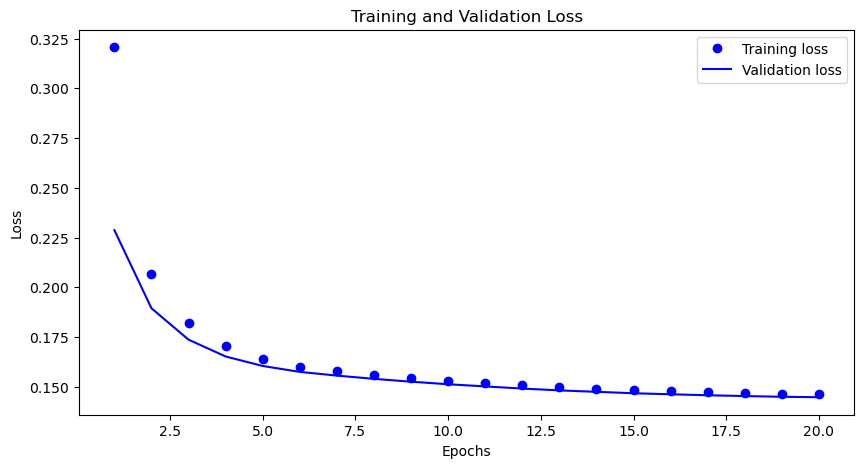

In [46]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# Create a plot for the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

313/313 [==============================] - 0s 209us/step


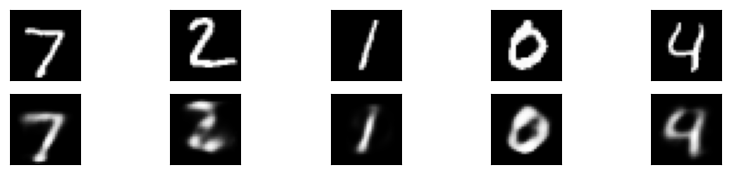

In [47]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 5  # how many digits we will display
plt.figure(figsize=(10, 2))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()